<h1>Heart Disease</h1> 
<br>
<h3> Context</h3> 
<br>  
<p style="font-size:16px">Based on information about heart disease I will use ML Decision Trees and Gradient Boosting Machines to see, what effect this will have on the model. General description and data are available on Kaggle: <a href>https://www.kaggle.com/ronitf/heart-disease-uci</a> 
<br> 
<h3>Attribute Information:</h3>
age<br>
sex (1=male, 0=female)<br>
chest pain type (4 values)<br>
resting blood pressure<br>
serum cholestoral in mg/dl<br>
fasting blood sugar > 120 mg/dl<br>
resting electrocardiographic results (values 0,1,2)<br>
maximum heart rate achieved<br>
exercise induced angina<br>
oldpeak = ST depression induced by exercise relative to rest<br>
the slope of the peak exercise ST segment<br>
number of major vessels (0-3) colored by flourosopy<br>
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
target: 1 - yes, 0 - no</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import classification_report,confusion_matrix

from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydot 
from six import StringIO

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<h3>Exploratory data analysis</h3>

<p style="font-size:18px">Table has 303 entries, no missing data and datatypes are also suitable for work</p>

Text(0.5, 1.0, 'Heart disease by age')

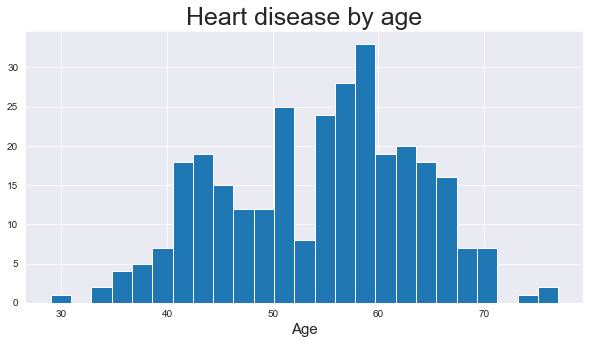

In [5]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
data['age'].hist(bins=25, figsize = (10, 5)) 
plt.xlabel('Age', fontsize=15)
plt.title("Heart disease by age",fontsize=25)

<p style="font-size:18px">By the age of 40, cases of heart disease increase. Heart disease is particularly common in the age group between 40 and 50 and between mid-50 and around 68 years of age.</p>

Text(0.5, 1.0, 'Heart disease by age')

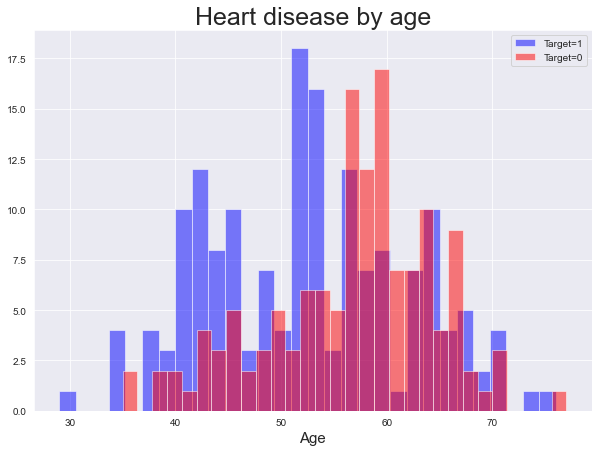

In [6]:
plt.figure(figsize=(10,7))
data[data["target"]==1]["age"].hist(alpha=0.5,color="blue",
                                              bins=30,label="Target=1")
data[data["target"]==0]["age"].hist(alpha=0.5,color="red",
                                              bins=30,label="Target=0")
plt.legend()
plt.xlabel("Age", fontsize=15)
plt.title("Heart disease by age",fontsize=25)

<p style="font-size:18px">The graph clearly shows that heart disease is increasing significantly in middle age. On the other hand, at the age of 60 there are more cases where people show fewer signs of heart disease.</p>

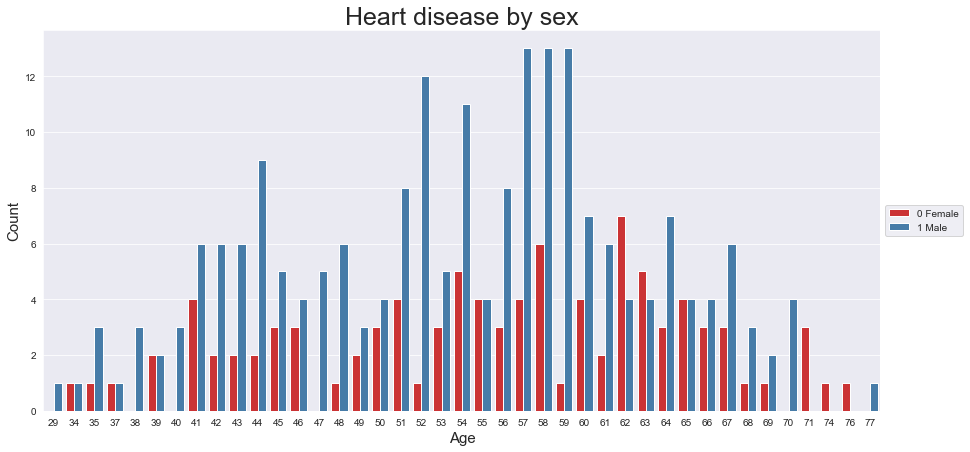

In [7]:
plt.figure(figsize=(15,7))
sns.countplot(x='age',hue='sex',data=data,palette='Set1')
plt.title("Heart disease by sex",fontsize=25)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.legend(['0 Female', '1 Male'],loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<p style="font-size:18px">The data shows heart problems for males twice as often as for females. We can see the numbers below.</p>

In [8]:
data[data["sex"]==1].count()

age         207
sex         207
cp          207
trestbps    207
chol        207
fbs         207
restecg     207
thalach     207
exang       207
oldpeak     207
slope       207
ca          207
thal        207
target      207
dtype: int64

In [9]:
data[data["sex"]==0].count()

age         96
sex         96
cp          96
trestbps    96
chol        96
fbs         96
restecg     96
thalach     96
exang       96
oldpeak     96
slope       96
ca          96
thal        96
target      96
dtype: int64

<h3>Split Data into train and test data.</h3>

In [10]:
X = data.drop(["target"], axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.30)

<h3>Decision Trees algorithm</h3>

In [11]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)

In [12]:
dtree.fit(X_train, y_train)  # train Data

DecisionTreeClassifier(max_depth=4, random_state=0)

In [13]:
predictions = dtree.predict(X_test) # Prediction

In [14]:
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.910
Accuracy on test set: 0.769


<p style="font-size:18px">Accuracy of the training set achieved 90%, Accuracy of the test set achieved 79%.</p>

<h3>Analysis of the Decision Tree</h3>

In [15]:
# Create a list of features
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [16]:
col_df = list(data.columns.values)

In [17]:
col_df

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [18]:
del col_df[13]  # lösche spalte 13 --> das ist spalte "target"

In [19]:
from sklearn.tree import export_graphviz

In [20]:
export_graphviz(dtree, out_file="tree.dot", class_names=["1", "0"],
                feature_names=col_df, # das ist die Liste von features 
                impurity=False, filled=True)

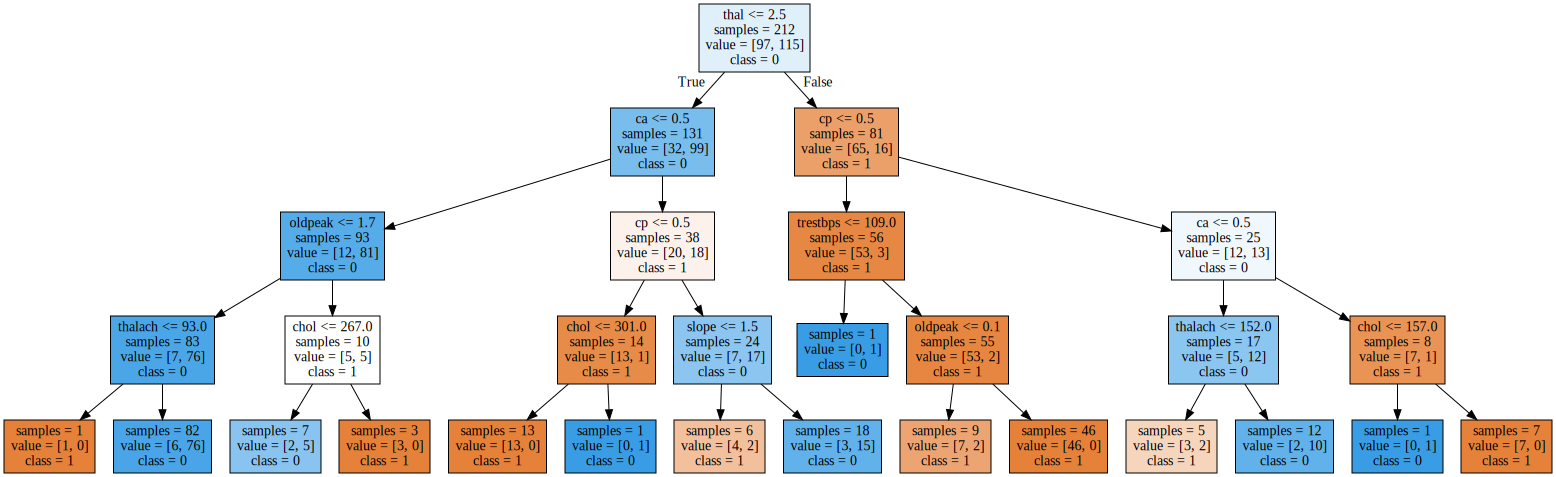

In [21]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

<p style="font-size:18px">Each knot (color) represents a new decision.</p>

In [22]:
print("Feature importances:")
print(dtree.feature_importances_)

Feature importances:
[0.         0.         0.1965867  0.02440311 0.07692756 0.
 0.         0.04044137 0.         0.05120543 0.03010209 0.16304622
 0.41728752]


In [23]:
data_1 = data.copy()
data_1 = data_1.drop("target", axis=1)
data_1.shape

(303, 13)

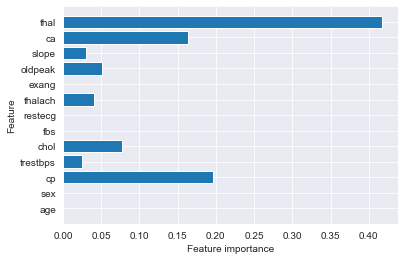

In [24]:
def plot_feature_importances_data(model):
    n_features = data_1.shape[1]  # here I set the number of features = columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), col_df) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_data(dtree) 

<p style="font-size:18px">We can clearly see that the feature "cp" used for the first division is by far the most important feature. Followed by "ca" and "exang".<br>
The disadvantage of decision trees is that even with pre-prunning they tend to overfit their traindata. To make the modell more powerful, i decide my self to apply ensembles method Gradient Boosting.</p>

<h3>Gradient Boosting</h3>

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.915
Accuracy on test set: 0.769


<p style="font-size:18px">As expected, the values for training set get a little lower, accurcy achieved 89%, accuracy for test set achived 80%.</p>

In [27]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.906
Accuracy on test set: 0.802


<p style="font-size:18px">With the use of the learning_rate, the model has improved again.</p>

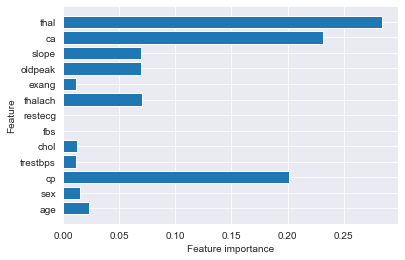

In [28]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_data(gbrt)

<p style="font-size:18px">This graph clearly shows that there are more important features after applying gradient boosting. The values from the "cp" and the "ca" columns are the most important features.</p>

<h3>Uncertainty estimates from classifiers.</h3>

In [29]:
print("X_test.shape:", X_test.shape)
print("Decision function shape:",
      gbrt.decision_function(X_test).shape)

X_test.shape: (91, 13)
Decision function shape: (91,)


<p style="font-size:18px">The values in the array indicate how strongly the model believes that a data point belongs to the "positive" category, in this case category 1. Positive numbers represent a preference for the positive category and negative numbers for a preference for the "negative" (other) category.</p>

In [30]:
# show the first few entries of decision_function
print("Decision function:", gbrt.decision_function(X_test)[:6])

Decision function: [ 1.88595948 -1.31422279 -2.07643913 -0.80110472  1.7437854  -1.97433645]


In [31]:
# prediction

In [32]:
print("Thresholded decision function:\n",
      gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

Thresholded decision function:
 [ True False False False  True False  True False  True  True  True  True
 False  True  True False  True  True False False  True  True False False
  True  True False  True False False False  True False False  True  True
  True  True  True False  True  True  True  True False False False  True
  True  True  True False False  True  True False  True False False  True
  True  True  True False False  True False False False False False  True
 False  True False  True False  True  True  True False False  True  True
 False  True  True False  True  True  True]
Predictions:
 [1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1
 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1]


In [33]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions:",
      np.all(pred == gbrt.predict(X_test)))

pred is equal to predictions: True


In [34]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

Decision function minimum: -4.17 maximum: 4.15


<p style="font-size:18px">The model outputs the scaling range for decision_function from -4.17 to +4.15 and seems sure to have assigned the classes (0 and 1) well.</p> 

<h3>Conclusion:</h3>
<p style="font-size:18px">The use of gradient boosting made the model stronger. The number of trees was reduced to the minimum so that the model does not become too complex and thus lead to overfitting. When checking the uncertainty estimates of the classifiers, the model showed that the classes were assigned very well.</p>   